In [43]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


In [44]:
# We don't need y_train and y_test
(X_train, _), (X_test, _) = fashion_mnist.load_data()

print('Max value in the X_train is', X_train[0].max())
print('Min value in the X_train is', X_train[0].min())

Max value in the X_train is 255
Min value in the X_train is 0


In [45]:
# Train & Test shape
print('Shape of X_train is', X_train.shape)
print('Shape of X_test is', X_test.shape)

Shape of X_train is (60000, 28, 28)
Shape of X_test is (10000, 28, 28)


In [46]:
import matplotlib.pyplot as plt

def plot_images(imgs):
    fig, axs = plt.subplots(5, 10)
    fig.tight_layout(pad=-1)
    plt.gray()
    a = 0
    for i in range(5):
        for j in range(10):
            axs[i, j].imshow(tf.squeeze(imgs[a]))
            axs[i, j].xaxis.set_visible(False)
            axs[i, j].yaxis.set_visible(False)
            a = a + 1

def plot_fashion(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")


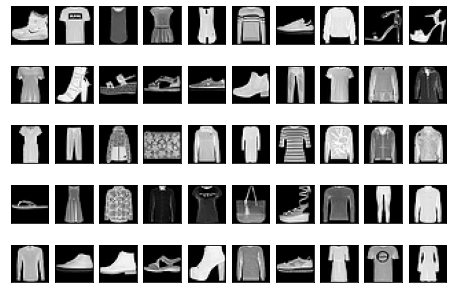

In [47]:
# show sample of 50 images from data
plot_images(X_train)

In [50]:
import numpy as np

# we need to extend dimentions to add 1-D for grayscale channle
new_X_train = np.expand_dims(X_train, axis=3)
new_X_test = np.expand_dims(X_test, axis=3)

# Train & Test shape
print('Shape of new_X_train is', new_X_train.shape)
print('Shape of new_X_test is', new_X_test.shape)


Shape of new_X_train is (60000, 28, 28, 1)
Shape of new_X_test is (10000, 28, 28, 1)


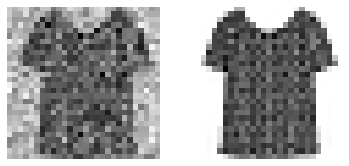

In [60]:
def get_some_noise(data):
    return np.random.randint(0, 100, (len(data), 784))

def get_some_noise2(data, factor=0.5):
    return factor * np.random.normal(0, 100, data.shape)


# Reshape images
new_X_train = np.reshape(new_X_train, (new_X_train.shape[0], 784))
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], 784))

# Adding some noise to images
X_train_mod = new_X_train + get_some_noise2(new_X_train)
y_train_mod = new_X_train
X_test_mod = new_X_test + get_some_noise2(new_X_test)
y_test_mod = new_X_test

# Show image after noise Vs Before
some_index = 1000
plt.subplot(121)
plot_fashion(X_test_mod[some_index])
plt.subplot(122)
plot_fashion(y_test_mod[some_index])
plt.show()


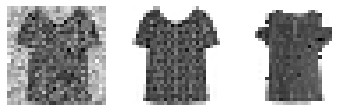

In [61]:
# KNN multioutput classifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_fashion = knn_clf.predict([X_test_mod[some_index]])

plt.subplot(131)
plot_fashion(X_test_mod[some_index])
plt.subplot(132)
plot_fashion(y_test_mod[some_index])
plt.subplot(133)
plot_fashion(clean_fashion)
plt.show()

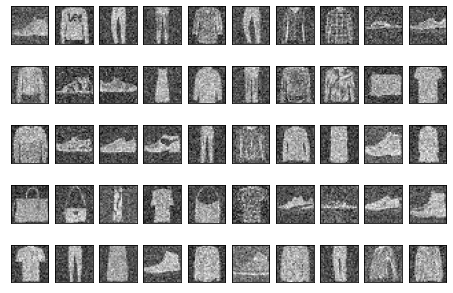

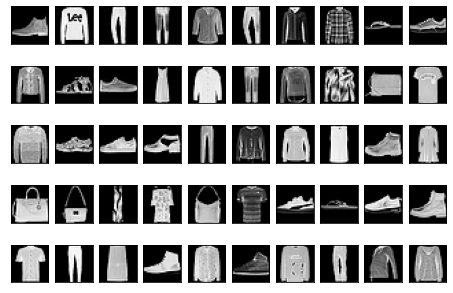

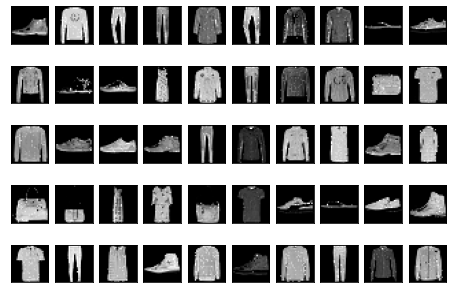

In [71]:
pred_imgs = knn_clf.predict(X_test_mod[0:50])

reshaped_preds = lambda data : np.reshape(data, (data.shape[0], 28, 28))

plot_images(reshaped_preds(X_test_mod[0:50]))
plot_images(reshaped_preds(y_test_mod[0:50]))
plot_images(reshaped_preds(pred_imgs))
